<a href="https://www.kaggle.com/code/kelixirr/time-series-forecasting-in-tensorflow?scriptVersionId=146414560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Predict the price of Bitcoin based on historical data

In [40]:
# Download The Data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-10-13 06:59:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-10-13 06:59:34 (6.87 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [41]:
import pandas as pd
df = pd.read_csv("/kaggle/working/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates = ["Date"], index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [43]:
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [44]:
df.dtypes

Currency                object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object

In [45]:
len(df)

2787

In [46]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


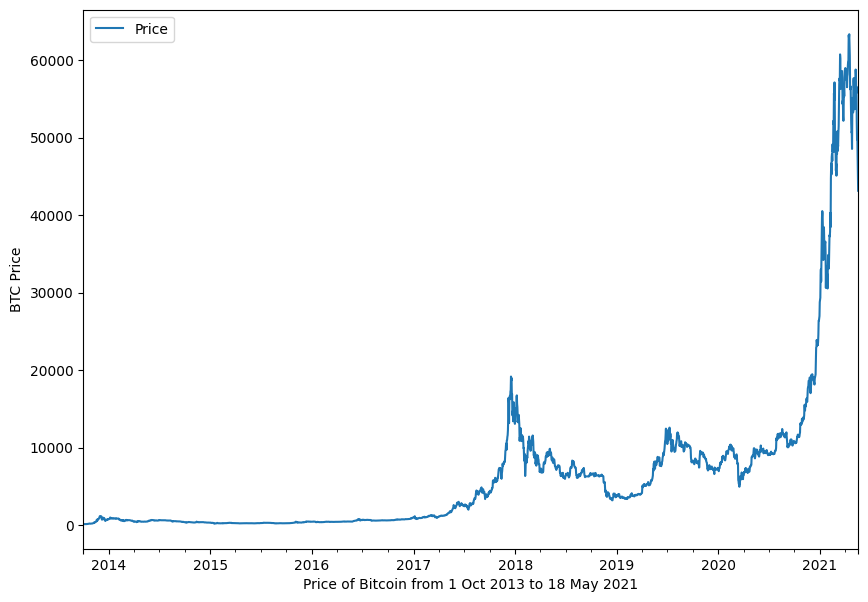

In [47]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Price of Bitcoin from 1 Oct 2013 to 18 May 2021")
plt.legend();

In [69]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [70]:
# creating train and test split for th data
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

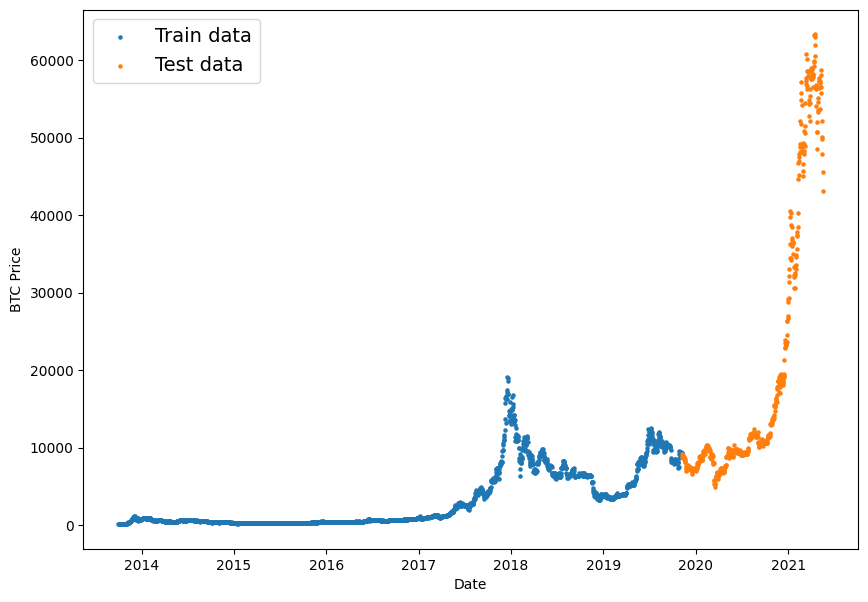

In [71]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [72]:
# function to plot time series data
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend()
    plt.grid()

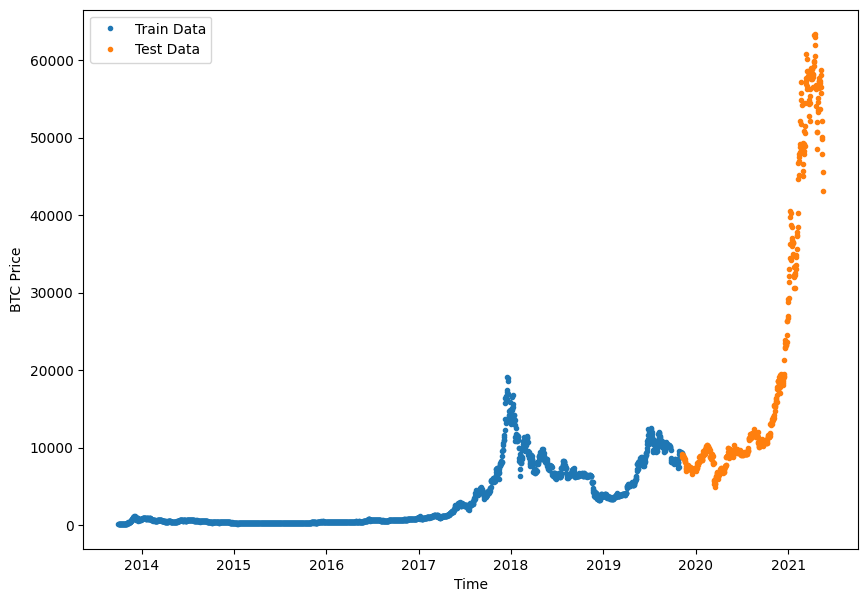

In [73]:
plt.figure(figsize = (10, 7))
plot_time_series(X_train, y_train, label = "Train Data")
plot_time_series(X_test, y_test, label = "Test Data")

## Model 0: Naive Forecast. Baseline

In [74]:
# creating Naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

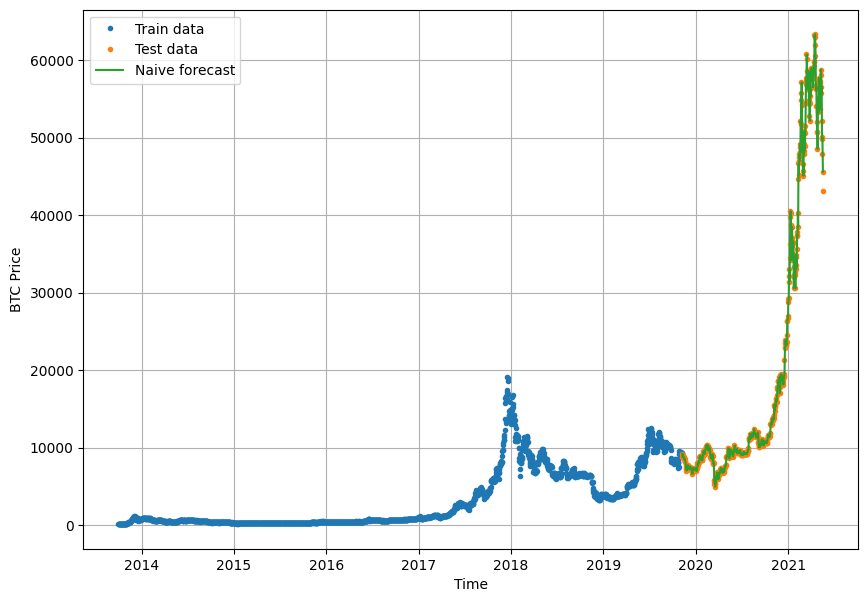

In [75]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

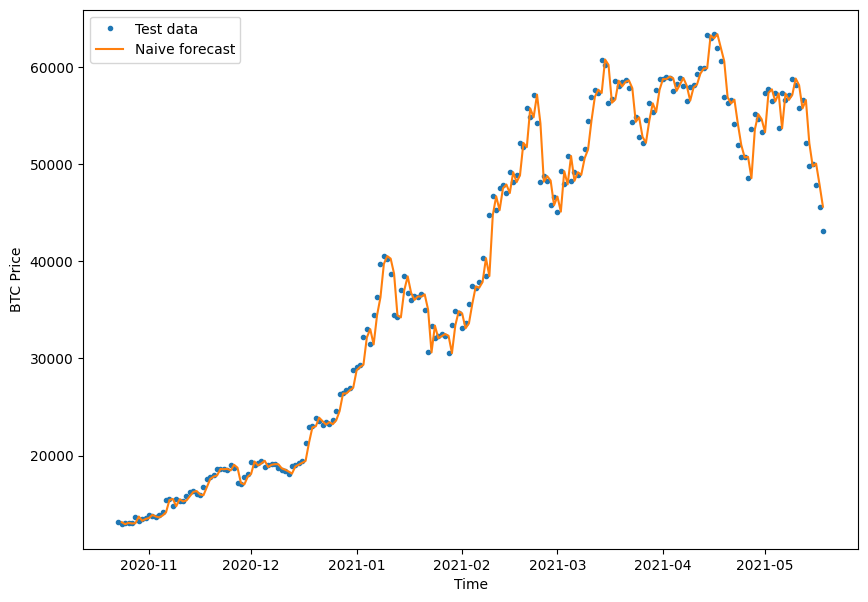

In [76]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, start = 350, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start = 350, label="Naive forecast");

MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.

In [77]:
# Evaluation 
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

    return mae / mae_naive_no_season

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [78]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    results = {"mae": mae.numpy(),
               "mse": mse.numpy(),
               "rmse": rmse.numpy(),
               "mape": mape.numpy(),
               "mase": mase.numpy()}
    
    return results

In [79]:
# naive results
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [80]:
# Find average price of Bitcoin in test dataset
import numpy as np 
np.mean(y_test)

20056.632963737222

In [81]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [82]:
# function to label windowed data
def get_labelled_windows(x, h = 1):
    return x[:, :-h], x[:, -h:]

In [83]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) + 1, axis = 0), h = HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [84]:
# function to create numpy array as windows
def make_windows(x, window_size = 7, horizon = 1):
    
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    # 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon - 1)), axis=0).T
    
    # Index on the target array
    windowed_array = x[window_indexes]
    
    # Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, h=horizon)
    
    return windows, labels

In [85]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [86]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [87]:
# make train/test split
def make_train_test_splits(windows, labels, test_split = 0.2):
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [88]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [89]:
train_windows[:2], train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]),
 array([[123.033],
        [124.049]]))

### Creating Model Checkpoint

In [90]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                              verbose = 0,
                                              save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

In [91]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100, 
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 44ms/step - loss: 2598.1467 - mae: 2598.1467 - val_loss: 2995.0098 - val_mae: 2995.0098
Epoch 2/100
18/18 [==============================] - 1s 39ms/step - loss: 381.9312 - mae: 381.9312 - val_loss: 1652.3003 - val_mae: 1652.3003
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 237.3781 - mae: 237.3781 - val_loss: 1094.7192 - val_mae: 1094.7192
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 187.0652 - mae: 187.0652 - val_loss: 1012.8590 - val_mae: 1012.8590
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 180.7455 - mae: 180.7455 - val_loss: 1033.0875 - val_mae: 1033.0875
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - loss: 175.1558 - mae: 175.1558 - val_loss: 975.4193 - val_mae: 975.4193
Epoch 7/100
18/18 [==============================] - 0s 29ms/step - loss: 170.9800 - mae: 170.9800 - val_loss: 960.1512 - val_mae: 960.1512
Epoch 8/1

In [92]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 653.9042 - mae: 653.9042


[653.9042358398438, 653.9042358398438]

In [93]:
# Load in saved best performing model_1
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.8509 - mae: 564.8509


[564.8508911132812, 564.8508911132812]

In [94]:
# making forecast on test data
def make_preds(model, input_data):
    
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [95]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8870.922 , 8791.112 , 9031.535 , 8789.81  , 8749.564 , 8746.351 ,
        8682.007 , 8537.5625, 8466.642 , 8531.107 ], dtype=float32)>)

In [96]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 564.8509,
 'mse': 1163803.2,
 'rmse': 1078.7971,
 'mape': 2.5180748,
 'mase': 0.99228656}

In [97]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

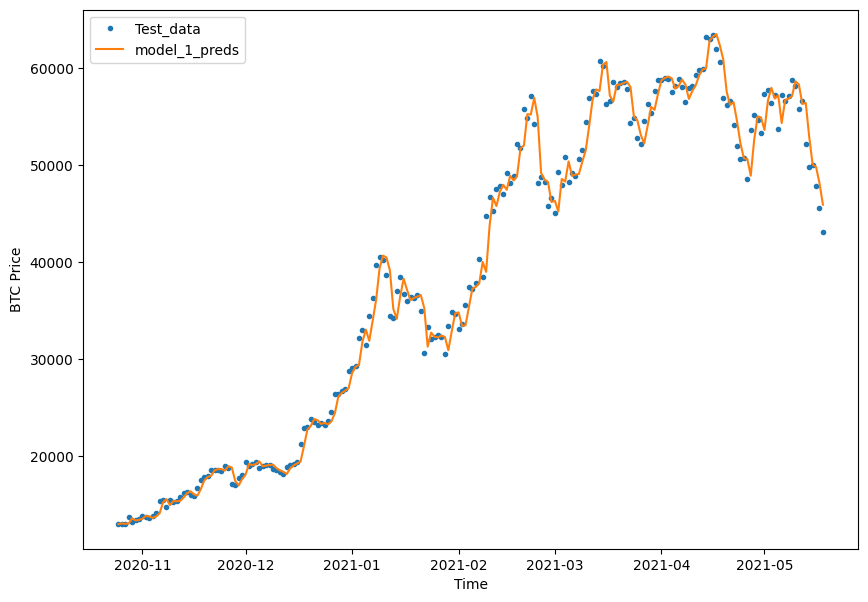

In [98]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=350, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=350, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [99]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [100]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [101]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [102]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [103]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.9967 - mae: 609.9967


[609.9967041015625, 609.9967041015625]

In [104]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.3582 - mae: 609.3582


[609.3582153320312, 609.3582153320312]

In [105]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [106]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 609.3582,
 'mse': 1287890.4,
 'rmse': 1134.8525,
 'mape': 2.7741592,
 'mase': 1.0651642}

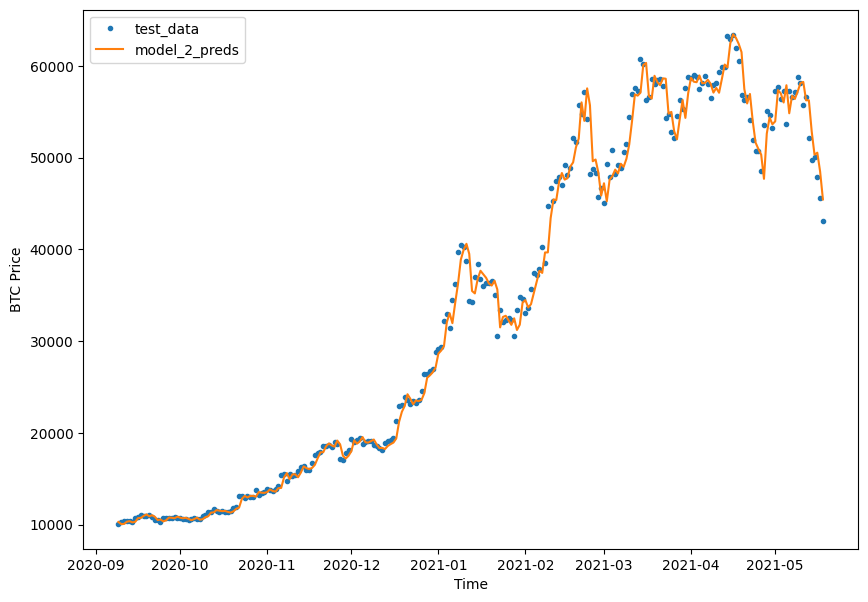

In [107]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

## Model 3: Dense (window = 30, horizon = 7)

In [108]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [109]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [110]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [111]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1459.5912


1459.5911865234375

In [112]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1245.3435


1245.343505859375

In [113]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9434.081 , 9583.231 , 9588.775 , 9579.672 , 9742.633 , 9440.46  ,
        9637.491 ],
       [9012.704 , 9255.312 , 9224.532 , 9314.318 , 9336.3545, 9247.099 ,
        9286.862 ],
       [8687.923 , 9014.886 , 9013.053 , 9183.688 , 8979.421 , 9113.366 ,
        9003.653 ],
       [8878.625 , 9131.978 , 9169.62  , 9475.783 , 9083.239 , 9267.62  ,
        9117.382 ],
       [8800.216 , 8999.451 , 9084.763 , 9362.107 , 9087.472 , 9060.484 ,
        8922.571 ]], dtype=float32)>

In [114]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  779.1198  ,   488.34164 ,   407.50125 ,   534.01215 ,
          490.9471  ,   602.58014 ,   559.1505  ,   582.23193 ,
          530.1566  ,   539.50665 ,   717.3129  ,   756.06976 ,
          869.18976 ,   881.77734 ,   603.79724 ,   214.58447 ,
          246.52727 ,   273.4451  ,   305.50775 ,   245.72273 ,
          145.93178 ,   193.56857 ,   372.0314  ,   404.76932 ,
          226.97127 ,   140.28098 ,    60.426617,   147.21135 ,
          139.09898 ,   208.24121 ,   288.49567 ,   408.70486 ,
          430.768   ,   430.48486 ,   383.5738  ,   345.10162 ,
          448.93784 ,   249.06613 ,   235.93123 ,   176.53586 ,
          464.18402 ,    76.08594 ,   101.69664 ,    83.871025,
          113.33956 ,   136.59724 ,   104.92494 ,   146.15451 ,
          113.962685,   129.229   ,   135.155   ,   162.51164 ,
          229.38902 ,   208.65207 ,   258.252   ,   310.63873 ,
          544.93805 ,   432.13016 ,   417.45572 ,   517.85583 ,
          333.39355 ,   189.60979

In [115]:
# Making evaluate preds work for multi-dimensional

def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

   # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
        
    results = {"mae": mae.numpy(),
               "mse": mse.numpy(),
               "rmse": rmse.numpy(),
               "mape": mape.numpy(),
               "mase": mase.numpy()}
    
    return results

In [116]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results   

{'mae': 1245.3435,
 'mse': 5481591.5,
 'rmse': 1431.1787,
 'mape': 5.632095,
 'mase': 2.2160192}

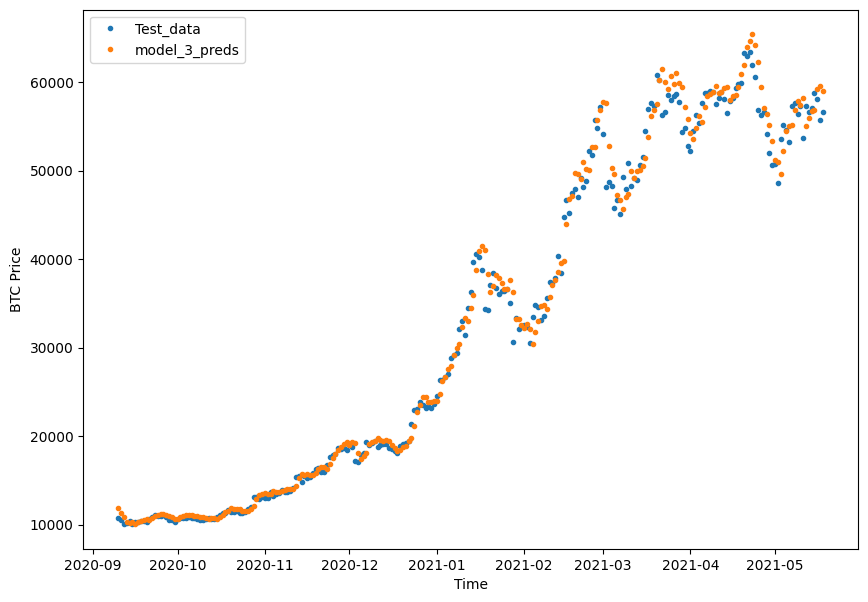

In [117]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, label="model_3_preds")

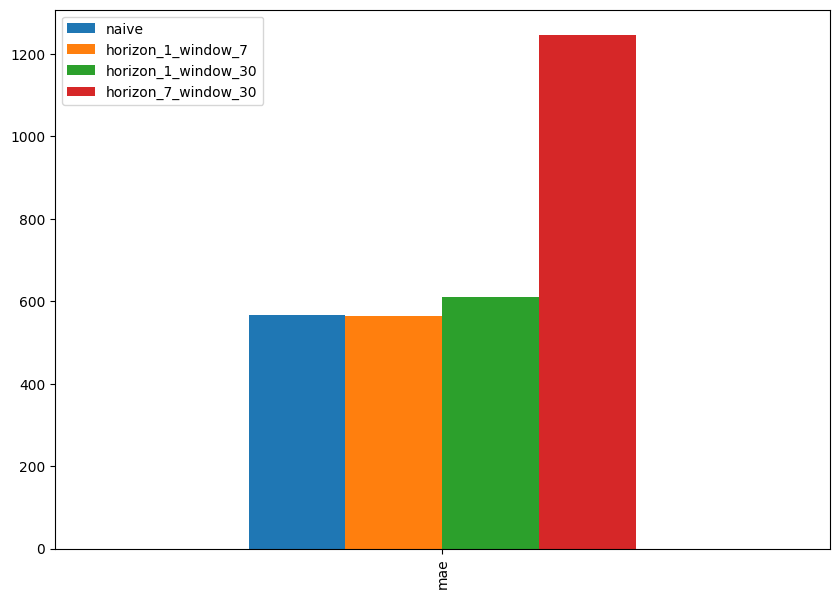

In [118]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Our naive model and model 1 seems to be performing better and are almost close

## Model 4: Conv1D

In [119]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [120]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [121]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [122]:
train_windows[0].shape

(7,)

In [123]:
# reshaping our data for CONV1D
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))
print(f'Original Value: {x}')
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original Value: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [124]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON),
    
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [125]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [126]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.4045


569.4044799804688

In [127]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8865.819 , 8768.73  , 8975.402 , 8782.855 , 8738.173 , 8714.524 ,
       8659.311 , 8522.429 , 8443.5205, 8498.113 ], dtype=float32)>

In [128]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.4045,
 'mse': 1178236.4,
 'rmse': 1085.466,
 'mape': 2.55028,
 'mase': 1.000286}

## Model 5: RNN (LSTM)

In [129]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [130]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 602.3218


602.32177734375

In [131]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8968.232, 8811.155, 8979.436, 8809.435, 8732.056, 8779.481,
       8692.779, 8549.051, 8491.858, 8515.597], dtype=float32)>

In [196]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 602.3218,
 'mse': 1284582.0,
 'rmse': 1133.3939,
 'mape': 2.6940887,
 'mase': 1.0581125}

In [132]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Make a multivariate time series - Adding Block Reward Column To Improve Data

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

In [133]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


Block rewards and dates were sourced from cmcmarkets.com. They are not the part of datasets

In [134]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [135]:
(bitcoin_prices.index[0])

Timestamp('2013-10-01 00:00:00')

In [136]:
block_reward_3_datetime - bitcoin_prices.index[0]

Timedelta('1012 days 00:00:00')

In [137]:
# to make them as same frequency as our original variable
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [138]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

In [139]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


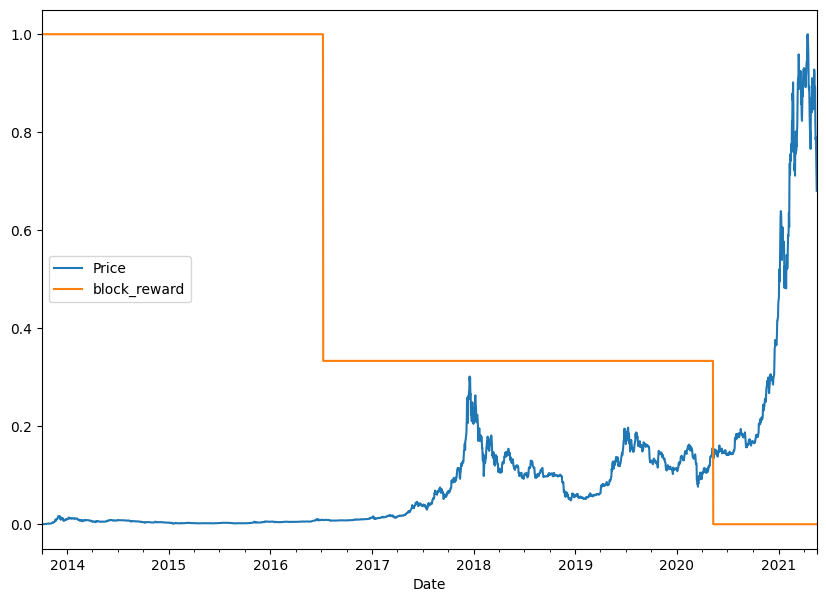

In [140]:
from sklearn.preprocessing import minmax_scale   # for scaling the data first
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [141]:
# Making a windowed dataset with pandas
HORIZON = 1
WINDOW_SIZE = 7

In [142]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [143]:
# create X & y, remove the NaN's and convert to float32 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [144]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [145]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [146]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
    
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [147]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.1644


566.1643676757812

In [148]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.39 , 8752.039, 8995.881, 8765.117, 8700.161, 8685.103,
       8666.044, 8515.133, 8408.371, 8506.621], dtype=float32)>

In [149]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 566.16425,
 'mse': 1166501.5,
 'rmse': 1080.047,
 'mape': 2.5528219,
 'mase': 0.99459374}

In [150]:
model_1_results

{'mae': 564.8509,
 'mse': 1163803.2,
 'rmse': 1078.7971,
 'mape': 2.5180748,
 'mase': 0.99228656}

## Model 7: N-BEATS algorithm

### Building N-Beats layer using tensorflow 

In [151]:
class NBeatsBlock(tf.keras.layers.Layer):
    
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs): # for parent class
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
    
        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")
    
    # runs when layer is called
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        
        #Output the backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, - self.horizon:]
        return backcast, forecast

###  Preparing data for the N-BEATS

In [152]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [153]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [154]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [155]:
# Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [156]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [157]:
tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(stack_input)

#Add in subtraction residual
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): 
    
    # Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}")(residuals) # pass it in residuals (the backcast)

    # Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
    
# Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, 
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 280: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 380: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [158]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 575.3960 - mae: 575.3960 - mse: 1156975.2500


[575.39599609375, 575.39599609375, 1156975.25]

In [159]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8967.721, 8849.5  , 9027.942, 8804.16 , 8836.682, 8793.324,
       8693.275, 8577.895, 8525.517, 8533.37 ], dtype=float32)>

In [160]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 575.396,
 'mse': 1156975.2,
 'rmse': 1075.6278,
 'mape': 2.6332736,
 'mase': 1.0108114}

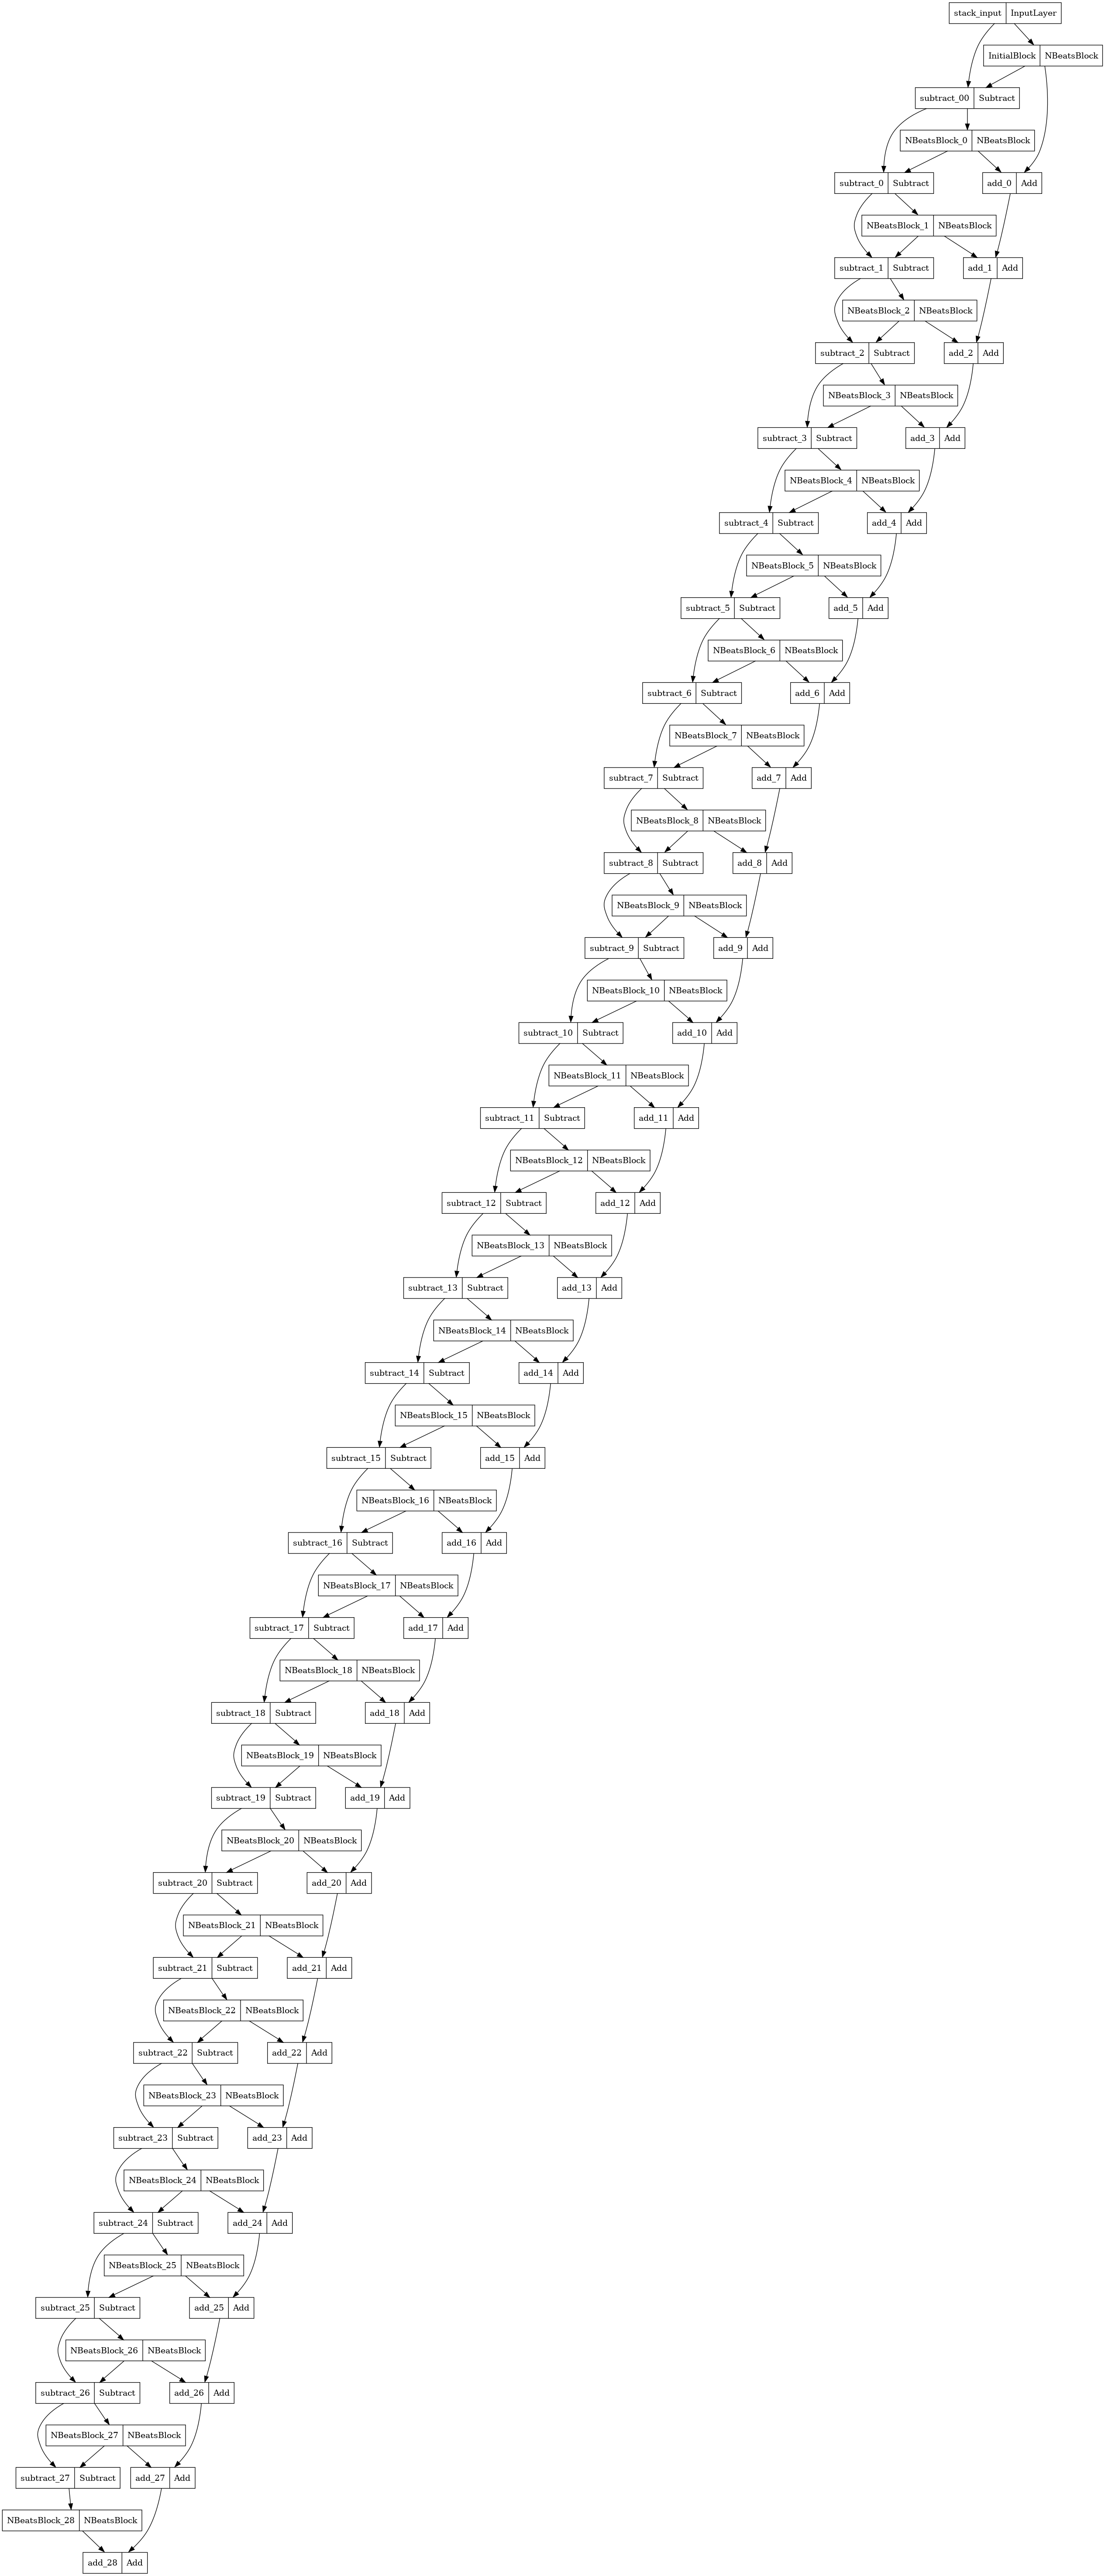

In [161]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [162]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):  
    ensemble_models = []
    
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
            model = tf.keras.Sequential([
            # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
            #interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
            layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
            layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
            layers.Dense(HORIZON)])
            
            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae", "mse"])
            
            # Fit model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                      patience=100,
                                                                      verbose=1)])
            
            ensemble_models.append(model)
    return ensemble_models

In [163]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 779: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 990: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 287: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 387: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 869: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 624: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 724: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 161: ReduceLROnPlateau reduci

In [164]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data) # make predictions with current ensemble model
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [165]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 43ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8737.414 ,  8760.74  ,  9070.033 , ..., 49099.13  , 48838.023 ,
        47002.254 ],
       [ 8681.928 ,  8753.054 ,  9098.4375, ..., 50941.203 , 48896.496 ,
        46252.777 ],
       [ 8823.763 ,  8793.131 ,  9070.672 , ..., 49605.383 , 49031.617 ,
        46125.152 ],
       ...,
       [ 8787.241 ,  8768.719 ,  9092.58  , ..., 49927.54  , 48997.695 ,
        45333.082 ],
       [ 8770.068 ,  8702.406 ,  9082.687 , ..., 50510.957 , 48481.21  ,
        46064.75  ],
       [ 8810.976 ,  8804.638 ,  9070.491 , ..., 49802.91  , 48378.332 ,
        45377.59  ]], dtype=float32)>

In [166]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.3889,
 'mse': 1149154.9,
 'rmse': 1071.9863,
 'mape': 2.5708156,
 'mase': 0.9985019}

In [171]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): #Take the predictions of multiple randomly initialized deep learning neural networks
  
        # Measure the standard deviation of the predictions
        std = tf.math.reduce_std(preds, axis=0)
  
        # Multiply the standard deviation by 1.96
        interval = 1.96 * std 

        # Get the prediction interval upper and lower bounds
        preds_mean = tf.reduce_mean(preds, axis=0)
        lower, upper = preds_mean - interval, preds_mean + interval
        return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

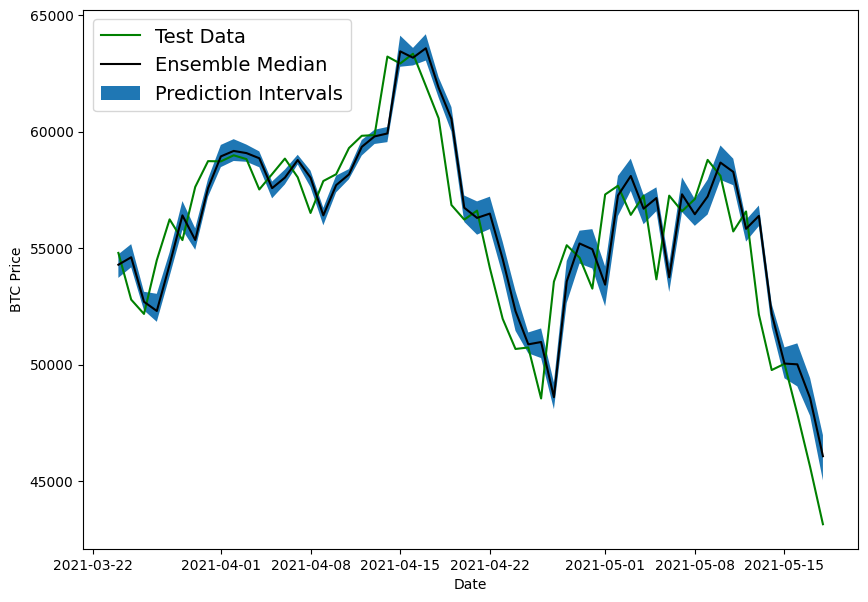

In [172]:

# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9: Train a model on the full historical data to make predictions into future : Without Test Set

In [173]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [174]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [175]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [176]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [177]:
INTO_FUTURE = 14 # timesteps to predict into the future - 14 days

In [182]:
# Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    future_forecast = []
    last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

    # Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
        # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        # print(future_forecast)

        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
    return future_forecast

In [183]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 54ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55416.00390625

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55416.00390625] -> Prediction: 51447.9453125

1/1 [==============================] - 0s 29ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55416.00390625 51447.9453125 ] -> Prediction: 49695.8984375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55416.00390625 51447.9453125  49695.8984375 ] -> Prediction: 49007.3828125

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55416.00390625
 51447.9453125  49695.8984375  49007.3828

In [184]:
future_forecast[:10]

[55416.004,
 51447.945,
 49695.9,
 49007.383,
 46875.72,
 45538.695,
 49307.316,
 54090.227,
 50626.42,
 49264.97]

In [215]:
def get_future_dates(start_date, into_future, offset=1):
    """ 
      Returns array of datetime values from ranging from start_date to start_date+horizon.

     start_date: date to start range (np.datetime64)
     into_future: number of days to add onto start date for range (int)
     offset: number of days to offset start_date by (default 1)
    """
    
    start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
    end_date = start_date + np.timedelta64(into_future, "D") # specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [216]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [217]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [218]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 43144.473, 55416.004, 51447.945, 49695.9  , 49007.383,
        46875.72 , 45538.695, 49307.316, 54090.227, 50626.42 , 49264.97 ,
        48108.234, 46708.695, 48029.113, 52012.92 ], dtype=float32))

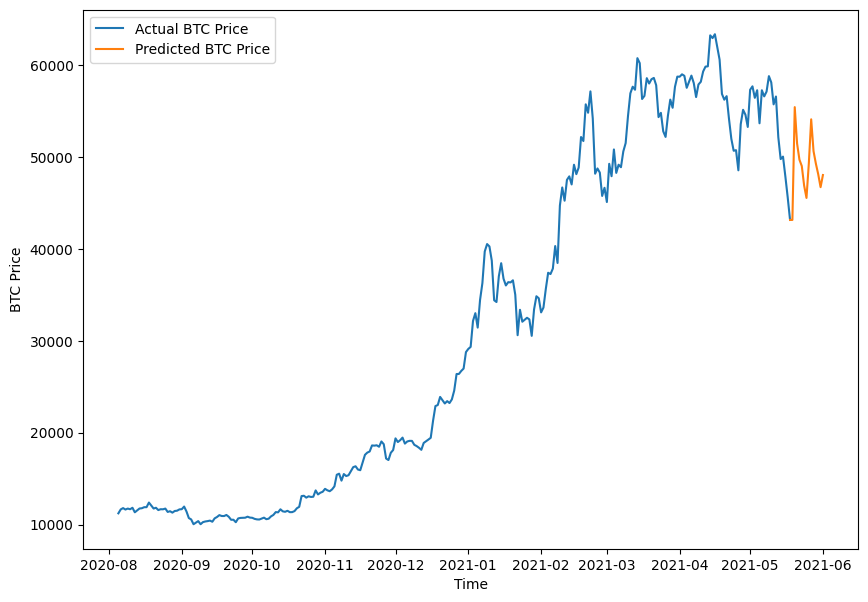

In [221]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast[:-1], format="-", label="Predicted BTC Price")

In [198]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              }).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,564.850891,1163803.250,1078.797119,2.518075,0.992287
model_2_dense_w30_h1,609.358215,1287890.375,1134.852539,2.774159,1.065164
model_3_dense_w30_h7,1245.343506,5481591.500,1431.178711,5.632095,2.216019
model_4_CONV1D,569.404480,1178236.375,1085.465942,2.550280,1.000286
model_5_LSTM,602.321777,1284582.000,1133.393921,2.694089,1.058113
model_6_multivariate,566.164246,1166501.500,1080.046997,2.552822,0.994594
model_8_NBEATs,575.395996,1156975.250,1075.627808,2.633274,1.010811
model_9_ensemble,568.388916,1149154.875,1071.986328,2.570816,0.998502


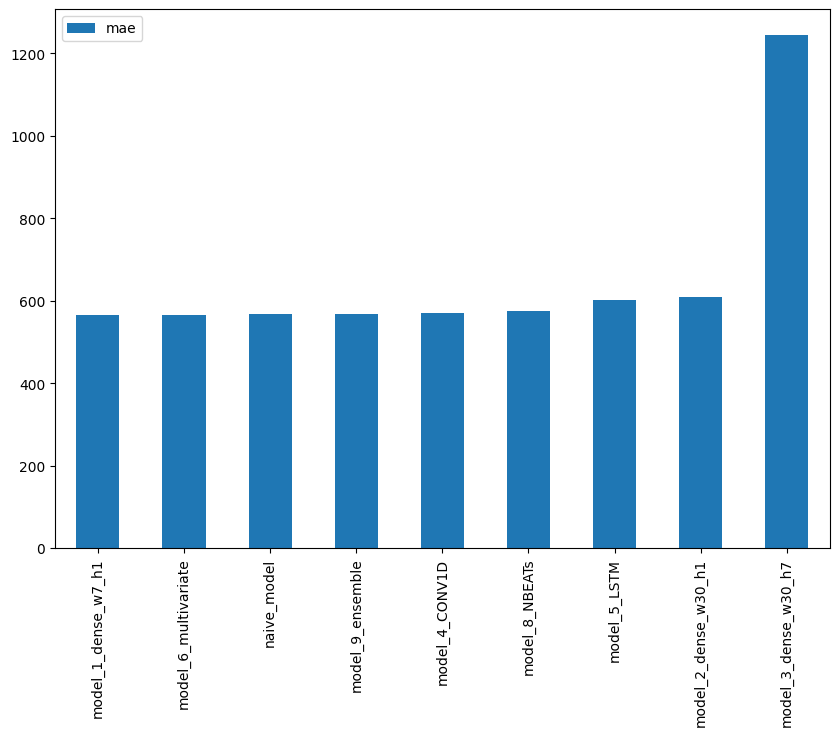

In [199]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");